<a href="https://colab.research.google.com/github/NuriaAk/DataLearn/blob/DE-101/Diamonds_one_factor_analysis__profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond quality analysis

**Goals**
*   To explore the data set
*   To understand what features are important for the price prediction


## Import libraries and a data set

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
diamonds_dataset = 'https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv'

In [196]:
df = pd.read_csv(diamonds_dataset)
df.head(3)

carat      cut color clarity  depth  table  price   'x'   'y'   'z'
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31

**Variables in the data set:**


1.   `carat` - a measure of the purity of diamond
2.   `cut` - how a diamond is cut and polished so that its facets can absorb and reflect light
3.   `color` - D-to-Z diamond color-grading system measures the degree of colorlessness by comparing a stone under controlled lighting
1.   `clarity` - the assessment of small imperfections on the surface and within the stone
2.   `depth` - height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
3.   `table` - the facet which can be seen when the stone is viewed face up
1.   `price` - measured in dollars
2.   `x` - size in (in millimeters)
3.   `y` - size in (in millimeters)
1.   `z` - size in (in millimeters)





The last three rows of the data set.
Number of rows: 53939.

In [197]:
df.tail(3)

carat        cut color clarity  depth  table   price   'x'   'y'   'z'
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

3 random rows.

In [198]:
df.sample(3)

carat        cut color clarity  depth  table   price   'x'   'y'   'z'
42923   0.41  Very Good     D    VVS2   61.2   55.0  1364.0  4.79  4.82  2.95
12654   1.00    Premium     E     SI1   60.5   59.0  5299.0  6.40  6.45  3.89
9175    1.00  Very Good     D     SI2   61.6   58.0  4543.0  6.37  6.45  3.95

## Exploratory Data Analysis

###Size and description of the data set

The diamonds data set contains 53940 rows and 10 columns.

In [199]:
df.shape

(53940, 10)

3 variables are categorical:

1.   `cut`
2.   `color`
2.   `clarity`

Other are numerical.
The variables does not contain Null values.



In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB





*   For most of the variables mins and max values do not deviate a lot from the mean values. But later we will check the outliers in a visual way.
*   We see that for some cases the 'x' , 'y', 'z' variables equals to zero. Theese may be rows with missing data.
*    Also the number of counts for variables `carat`, `depth`, `y` and `z` is different from the total number of rows. So we need to deal with missing data.


In [201]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53442.000000  53940  53940   53940  52950.000000  53940.000000   
unique           NaN      6      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21524  11292   13065           NaN           NaN   
mean        0.797561    NaN    NaN     NaN     61.749422     57.457184   
std         0.473534    NaN    NaN     NaN      1.431558      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price           'x'           'y'           'z'  
count   53940.000000  53940.000000  53935.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734469      3.538734  
std      3989.439738      1.121761      1.142125      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

### Data cleaning

In [202]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns
len(df)

53940

In [203]:
# Delete the rows where the size of a diamond = 0
df2 = df[(df['x'] != 0) | (df['y'] != 0) | (df['z'] != 0)]
len(df) - 19


53921

In [204]:
df.drop(df[df['z'] == 0].index, inplace = True)
df.drop(df[df['y'] == 0].index, inplace = True)
df.drop(df[df['x'] == 0].index, inplace = True)

We see 135 duplicated rows.

In [205]:
df.duplicated().sum()

134

Let's have a look at duplicated rows. Maybe it makes sense to get rid of them.

In [206]:
df[df.duplicated()]

carat    cut color clarity  depth  table   price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0  2898.0  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0  3105.0  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...     ...   ...   ...   ...
47296   0.30   Good     J     VS1   63.4   57.0   394.0  4.23  4.26  2.69
47969   0.52  Ideal     D     VS2   61.8   55.0  1919.0  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0  2093.0  5.17  5.19  3.17
50079   0.51  Ideal     F    VVS2   61.2   56.0  2203.0  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0  2579.0  5.21  5.18  4.09

[134 rows x 10 columns]

In [207]:
# Dropping the duplicates
df.drop_duplicates(inplace = True)
# Updating indexes
df.reset_index(inplace = True, drop = True)
df.shape


(53786, 10)

**Missing  Values (MV):**


*   If number of MV <= 1% we delete them;
*   If number of 1% < MV < 20% we fill them with median;
*   If number of MV > 20%, delete the column.



In [208]:
df.isnull().mean()*100

carat      0.925891
cut        0.000000
color      0.000000
clarity    0.000000
depth      1.840628
table      0.000000
price      0.000000
x          0.000000
y          0.009296
z          0.000000
dtype: float64

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

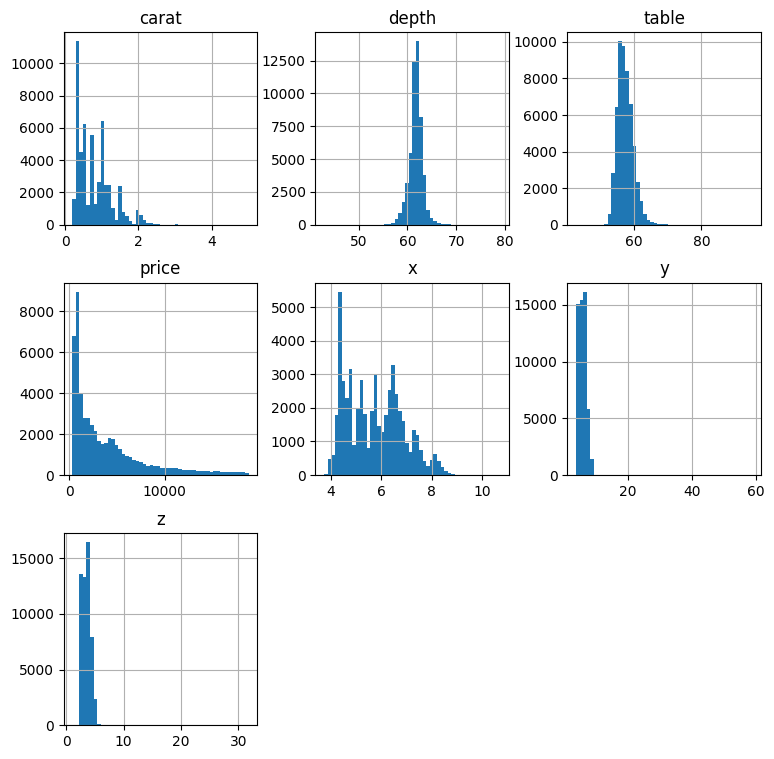

In [209]:
df.hist(bins = 50, figsize = (9,9))

Let's fill NA with medians for `carat`, `depth`, `y`.

In [210]:
carat_median = df['carat'].median()
df['carat'].fillna(carat_median, inplace = True)

In [211]:
depth_median = df['depth'].median()
df['depth'].fillna(depth_median, inplace = True)

In [212]:
y_median = df["y"].median()
df["y"].fillna(y_median, inplace = True)

In [213]:
y_s=round(y_median, 2)

In [214]:
# Let's check if there are some missing valuables left
df.isnull().sum().sum()

0

## One factor analysis

### Let's explore the factor 'carat'.

*   Small carats < 0.3;
*   Medium 0.3 <= carats < 1;
*   Large carats >=1.

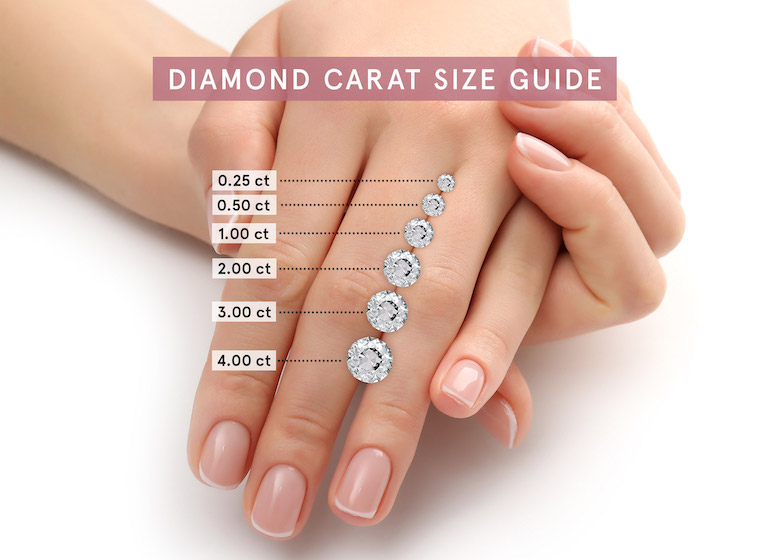

(array([1.6981e+04, 7.8760e+03, 9.6390e+03, 9.2790e+03, 3.7050e+03,
        3.3310e+03, 8.1500e+02, 1.4980e+03, 4.5200e+02, 1.4900e+02,
        2.5000e+01, 2.4000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.2   , 0.4405, 0.681 , 0.9215, 1.162 , 1.4025, 1.643 , 1.8835,
        2.124 , 2.3645, 2.605 , 2.8455, 3.086 , 3.3265, 3.567 , 3.8075,
        4.048 , 4.2885, 4.529 , 4.7695, 5.01  ]),
 <BarContainer object of 20 artists>)

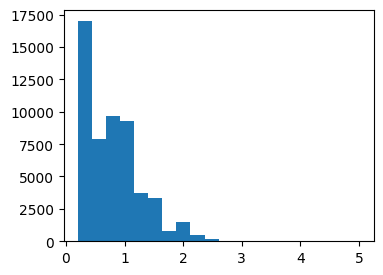

In [215]:
plt.figure(figsize=(4,3))
plt.hist(df.carat, bins = 20)

How many carats contain the biggest and the smallest stone?

In [216]:
df.carat.min(), df.carat.max()

(0.2, 5.01)

What is the percentage of big (carat>=1) stones in the data set?

In [217]:
round(len(df[df['carat']>=1])/len(df) * 100 , 1)

35.0

What is the percentage of small (carat< 0.3) stones in the data set?

In [218]:
round((len(df[df['carat'] < 0.3]) / len(df)) * 100 , 1)

2.9

How carat is correlated with the price?

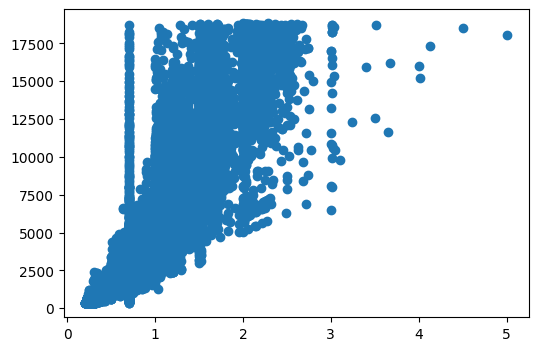

In [219]:
plt.figure(figsize=(6,4))
plt.scatter(df.carat, df.price)

We see that the variables are related to each other. Let's try to measure the correlation  coefficient.

In [220]:
round(np.corrcoef(df.carat, df.price)[0][1], 2)

0.92

### Let's explore the `'cut'` variable

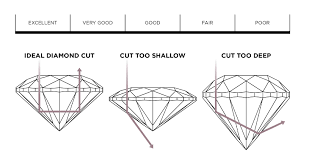

In [221]:
round(df['cut'].value_counts(normalize = True), 2)

Ideal        0.40
Premium      0.25
Very Good    0.22
Good         0.09
Fair         0.03
Goood        0.00
Name: cut, dtype: float64

Our cut range is not conventional and we have the "Goood" label. Is it 'Poor' or 'Good' with a typo?

In [244]:
df['cut'] = df['cut'].replace('Goood', 'Good')

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

How the cut influence on the average price?

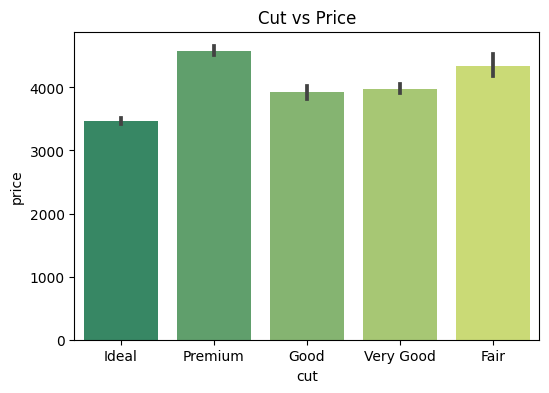

In [223]:
plt.figure(figsize = (6,4))

sns.barplot(x = 'cut', y = 'price', data = df, palette = 'summer')
plt.title('Cut vs Price')
plt.show();

Maximum number of carat for the Fair cut.

In [224]:
df[df['cut'] == 'Fair']['carat'].max()

5.01

Average Price of diamonds for each cut category.

In [225]:
df.groupby('cut')['price'].mean()

cut
Fair         4346.462116
Good         3923.470470
Ideal        3461.991380
Premium      4577.267828
Very Good    3982.066794
Name: price, dtype: float64

Let's have a look at other characteristics of different types of cuts.

In [226]:
df.groupby('cut').agg(PriceMedian = ('price', 'median'),
                      CaratMean = ('carat', 'mean')).sort_values(by = 'PriceMedian', ascending = False)

PriceMedian  CaratMean
cut                              
Fair            3282.0   1.040031
Premium         3174.5   0.889065
Good            3027.0   0.845297
Very Good       2648.0   0.804161
Ideal           1813.0   0.703253

Optimal depth for a diamond  [59%; 62.5%].

In [227]:
len(df[(df.depth >= 59) & (df.depth <= 62.5)])/ len(df)

0.727921764027814

Optimal table for a diamond  [59%; 62.5%].

In [228]:
len(df[(df.table >= 55) & (df.table <= 60)])/ len(df)

0.843992860595694

What is a percentage of diamonds that have optimal table and depth?

In [229]:
round(len(df[((df.depth >= 59) & (df.depth <= 62.5)) & ((df.table >= 55) & (df.table <= 60))])/ len(df) ,  2)

0.62

What is bigger: median price of all the diamonds or of diamonds with optimal table & depth?

In [230]:
df.price.median()

2401.0

What influence on a price more: table or depth?

In [231]:
table_corr = round(np.corrcoef(df.table, df.price)[0][1], 2)
depth_corr = round(np.corrcoef(df.depth, df.price)[0][1], 2)

print(table_corr, depth_corr)

0.13 -0.01


In [232]:
df_optimal_depth_table = df[((df.depth >= 59) & (df.depth <= 62.5)) & ((df.table >= 55) & (df.table <= 60))]
df_optimal_depth_table.price.median()

2214.0

How many categories are in the clarity column?

In [233]:
len(df.clarity.unique())

8

How many diamonds are in 'very very slightly included' (VVS1 or VVS2) category?

In [234]:
len(df[(df.clarity == 'VVS1') | (df.clarity =='VVS2')])

8703

Draw a graph price VS clarity.

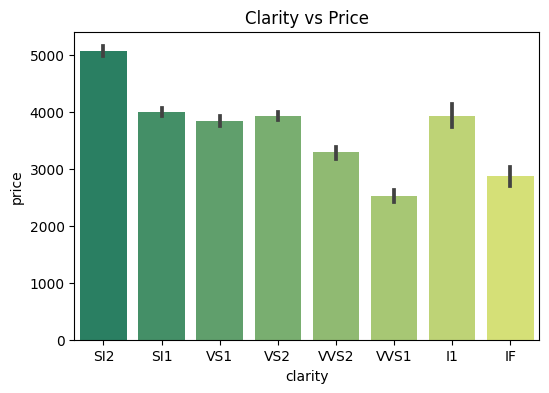

In [235]:
plt.figure(figsize = (6,4))

sns.barplot(x = 'clarity', y = 'price', data = df, palette = 'summer')
plt.title('Clarity vs Price')
plt.show();

For each pair (cut,clarity) let's find mean and average. Descending order for mean column.

Which cut - clarity pair has max average price?

In [245]:
df.groupby(['cut', 'clarity']).agg(PriceMean = ('price', 'mean'),
                      PriceMedian = ('price', 'median')).sort_values(by = 'PriceMean', ascending = False)

PriceMean  PriceMedian
cut       clarity                          
Premium   SI2      5551.614330       4294.0
Fair      SI2      5145.740175       3681.0
Very Good SI2      4988.709447       4042.0
Ideal     SI2      4761.637731       4067.5
Premium   VS2      4535.350195       2724.0
Good      SI2      4533.196676       3763.0
Premium   VS1      4491.247730       2362.0
          SI1      4445.191573       3613.5
Very Good IF       4373.299625       1708.0
Ideal     I1       4335.726027       3673.5
Good      VS2      4280.315631       3220.5
Very Good VS2      4217.485858       2726.0
Fair      SI1      4201.818182       3511.0
          VS2      4189.217054       3202.5
          VS1      4152.029586       2800.0
Good      IF       4141.931507       1806.0
Very Good I1       4078.226190       3283.0
Premium   I1       3958.881773       3263.0
Very Good SI1      3936.972136       2810.0
Fair      VVS1     3871.352941       2797.0
Premium   IF       3856.143478       1148.0
Very Good VS1      3805.480813       2326.5
Good      VS1      3799.741248       2427.0
Premium   VVS2     3784.643599       1334.0
Ideal     SI1      3755.110434       2537.0
Fair      I1       3703.533333       2397.0
Good      SI1      3688.387015       2723.0
          I1       3589.797872       3118.5
Ideal     VS1      3490.985179       1815.0
Fair      VVS2     3349.768116       2484.0
Ideal     VS2      3288.171123       1689.0
          VVS2     3256.055212       1334.0
Good      VVS2     3118.108108       1866.5
Very Good VVS2     3037.394652       1032.0
Premium   VVS1     2813.680782       1115.0
Ideal     VVS1     2474.090240       1114.0
Very Good VVS1     2451.883249        941.0
Ideal     IF       2279.618257       1020.0
Good      VVS1     2272.391534        977.0
Fair      IF       1912.333333       1849.0

### Let's explore x,y,z dimensions

Which dimension correlates the most with the price?

In [237]:
df[['price', 'x', 'y', 'z']].corr()

price         x         y         z
price  1.000000  0.887183  0.867665  0.868089
x      0.887183  1.000000  0.974774  0.975395
y      0.867665  0.974774  1.000000  0.956581
z      0.868089  0.975395  0.956581  1.000000

X dimension correlates the most with the price.

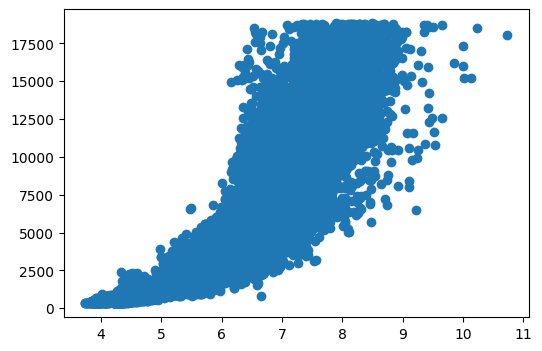

In [238]:
plt.figure(figsize=(6,4))
plt.scatter(df.x, df.price)

What is the share of diamonds with x and y more than average?

In [239]:
round(len(df[(df['x'] > df['x'].mean()) &  (df['y'] > df['y'].mean())])/len(df), 2)

0.47

Among big diamonds(>= 1 carat) how many of them have z dimension less than median z?

In [240]:
big_df = df[df['carat']>=1]
round(len(big_df[big_df['z'] < df['z'].median()])/len(big_df), 4)

0.0002

### Let's explore colors

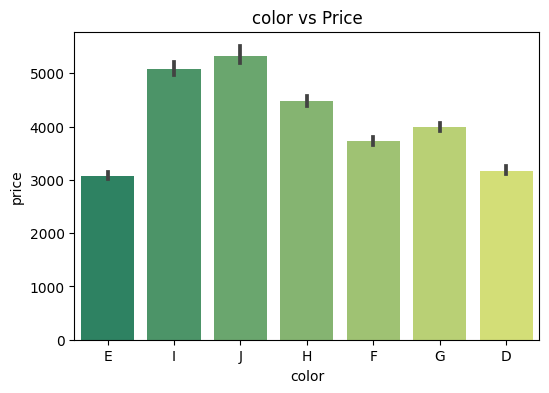

In [241]:
plt.figure(figsize = (6,4))

sns.barplot(x = 'color', y = 'price', data = df, palette = 'summer')
plt.title('color vs Price')
plt.show();

J color is the most expensive.

In [242]:
df.groupby('color').agg(PriceMedian = ('price', 'median'),
                        CaratMedian = ('carat', 'median')).sort_values('PriceMedian', ascending = False )

PriceMedian  CaratMedian
color                          
J           4234.5         1.11
I           3721.5         1.00
H           3449.5         0.90
F           2345.0         0.70
G           2242.0         0.70
D           1842.0         0.54
E           1741.0         0.54

In [246]:
df.groupby(['cut','color','clarity']).agg(PriceMean = ('price', 'mean')).sort_values('PriceMean', ascending = False )

PriceMean
cut       color clarity              
Very Good D     IF       10298.260870
Good      D     IF       10030.333333
Ideal     J     I1        9454.000000
Premium   D     IF        9056.500000
          J     SI2       7550.285714
...                               ...
Good      E     IF        1519.222222
Ideal     I     IF        1509.404255
Fair      G     IF        1488.000000
Premium   H     VVS1      1453.758929
Very Good J     IF        1074.125000

[276 rows x 1 columns]

## Data Profiling

In [75]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=1c7b607f815d84ba07dfc09558fe573af8e8a8e7174e4479e4a35a3c80e5b095
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [78]:
from ydata_profiling import ProfileReport

In [79]:
df_copy = pd.read_csv(diamonds_dataset)
profile_report = ProfileReport(df_copy, title = 'Pandas Profiling Report')

In [80]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [81]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]